# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

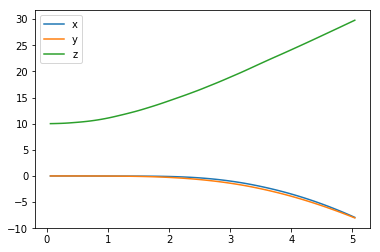

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

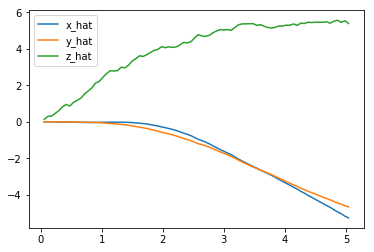

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

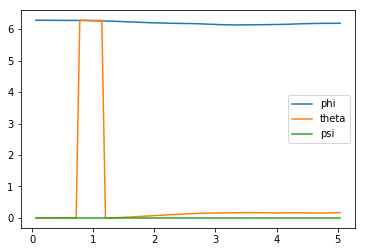

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

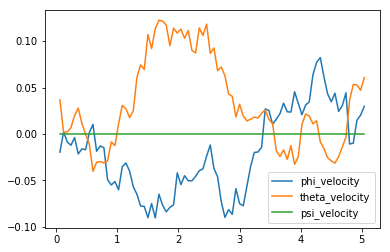

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

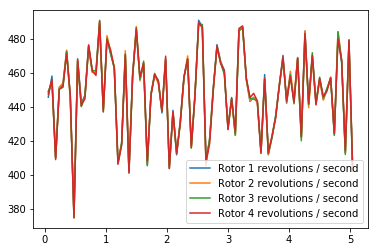

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -7.92018997  -8.02087288  29.77136964   6.18738182   0.16675484   0.        ]
[-5.27414938 -4.67322464  5.3939005 ]
[ 0.02970566  0.06062162  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.897 (best =  -0.062), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## TODO: Train your agent here.
import sys
import numpy as np
from newtask import Task
from agents.agent import DDPG

num_episodes = 1000
# num_episodes = 300
task = Task()
agent = DDPG(task) 
episode_scores = []
episode_states = []
# print("agent: ",agent.__dict__)
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} , max height = {} , max euler x rotation = {}".format(
#                 i_episode, score, agent.max_height, agent.max_x))  # [debug]
                i_episode, score, agent.max_height, agent.max_x), end="")  # [debug]
            break
    sys.stdout.flush()
    episode_scores.append(score)
    episode_states.append(agent.best_state)
print("Scores per episode: ")
# for i in range(len(episode_scores)):
#     print(i, ":", episode_scores[i])

# enum_episodes = list(enumerate(episode_scores)).sort(key = lambda x: x[1])
# print("Best episodes: ",enum_episodes[-10:])
# best_states = [episode_states[i] for i,v in enum_episodes[-10:]]
# print("Best states: ",best_states)
# print("Worst episodes: ",enum_episodes[:10])
# best_worst_states = [episode_states[i] for i,v in enum_episodes[:10]]
# print("Best worst states: ",best_worst_states)
bests = list(enumerate(zip(episode_scores,episode_states)))
bests.sort(key = lambda x: x[1], reverse = True)
for i,v in bests:
    print(i)
    print(v[0])
    print(v[1][:15])
    print(v[1][15:30])
    print(v[1][30:])

Using TensorFlow backend.


Episode = 1000, score =   1.090 , max height = 10.101782918975646 , max euler x rotation = 0.0Scores per episode: 
690
139.156455046
[-13.53778472  -5.1437573   35.56374075   3.30568757   3.26892301   0.           0.
   0.           0.           0.         -13.57161581  -5.15850333
  35.74682941   2.72897023   2.69207879]
[  0.           0.           0.           0.           0.         -13.60666256
  -5.17401597  35.93350795   2.15225379   2.11521642   0.           0.           0.
   0.           0.        ]
[]
737
138.775434758
[-13.59826684  -1.09747694  35.51348386   3.30494686   3.2839783    0.           0.
   0.           0.           0.         -13.63154016  -1.09219946
  35.69534304   2.7282967    2.70705283]
[  0.           0.           0.           0.           0.         -13.66594209
  -1.08772008  35.88086236   2.15160791   2.13014661   0.           0.           0.
   0.           0.        ]
[]
660
138.597332969
[-13.43865853  -2.14805739  35.49055204   3.27806874   3.2579

[-13.29891943  -1.12795276  35.05457848   3.22534835   3.23254235   0.           0.
   0.           0.           0.         -13.33118503  -1.1353103
  35.23582911   2.64862007   2.65582593]
[  0.           0.           0.           0.           0.         -13.36500466
  -1.14403395  35.42059884   2.07192154   2.07908248   0.           0.           0.
   0.           0.        ]
[]
594
135.246067061
[-13.25654881  -0.18510248  35.05162582   3.23559071   3.24011679   0.           0.
   0.           0.           0.         -13.28845753  -0.18358642
  35.23256643   2.65868019   2.66352612]
[  0.           0.           0.           0.           0.         -13.32187232
  -0.18337003  35.41707348   2.08178969   2.08692247   0.           0.           0.
   0.           0.        ]
[]
609
135.171893497
[-13.19956148  -2.37101681  35.04121847   3.24354154   3.27027961   0.           0.
   0.           0.           0.         -13.23172686  -2.39239538
  35.22226626   2.6669447    2.69338879]
[  0

   0.           0.        ]
[]
427
1.7298445296
[  1.07743758e-01  -6.08551686e-03   1.01268632e+01   1.61884196e+00
   4.80872493e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.68344721e-01  -1.78737354e-02
   1.01271782e+01   2.81284480e+00   4.88710224e+00]
[  0.           0.           0.           0.           0.           0.24111506
  -0.02872036  10.12253097   3.91453841   4.72255855   0.           0.           0.
   0.           0.        ]
[]
488
1.72665086993
[ -0.33664486  -0.14042477  10.1171676    0.47661703   4.65846272   0.           0.
   0.           0.           0.          -0.38121696  -0.13373614
  10.124018     2.25370765   5.55261335]
[  0.           0.           0.           0.           0.          -0.41097187
  -0.12209992  10.12231785   3.63018984   6.10173966   0.           0.           0.
   0.           0.        ]
[]
451
1.71422060227
[  0.3416736    0.0288377   10.14290364   0.05566474   2.52950144   0.       

  10.10145596   2.22051399   0.41914813]
[  0.           0.           0.           0.           0.          -0.12821747
   0.10274583  10.09652563   1.89743446   1.85007009   0.           0.           0.
   0.           0.        ]
[]
859
1.27270784948
[ -0.09705628   0.0679278   10.10160072   2.35784719   4.39287493   0.           0.
   0.           0.           0.          -0.11330393   0.08067866
  10.10244112   2.19258131   0.39975416]
[  0.           0.           0.           0.           0.          -0.12683293
   0.09599768  10.09782838   1.87078644   1.82726446   0.           0.           0.
   0.           0.        ]
[]
849
1.27217682107
[ -0.10140866   0.06117706  10.1022291    2.33238015   4.44404796   0.           0.
   0.           0.           0.          -0.11866033   0.07250735
  10.10350669   2.16678199   0.45179509]
[  0.           0.           0.           0.           0.          -0.13335314
   0.08652993  10.09929263   1.84493581   1.87950542   0.           0.    

[  0.           0.           0.           0.           0.          -0.13022877
   0.09528306  10.09702442   1.8615894    1.83835981   0.           0.           0.
   0.           0.        ]
[]
413
1.16810929371
[  6.02754252e-03   7.30102390e-02   1.00904847e+01   4.30065173e+00
   5.80684739e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.18129957e-02   7.49727912e-02
   1.00749094e+01   4.81863115e+00   5.72249321e+00]
[  0.           0.           0.           0.           0.           0.06400168
   0.06620244  10.0536805    5.29870748   5.53643314   0.           0.           0.
   0.           0.        ]
[]
904
1.16659125587
[ -0.09586828   0.0712588   10.10053438   2.36413834   4.22008185   0.           0.
   0.           0.           0.          -0.11101741   0.08517604
  10.10096992   2.19739981   0.20043072]
[  0.           0.           0.           0.           0.          -0.12285437
   0.10134739  10.09632282   1.87481034   1.60

[]
396
1.04254178887
[ -0.01803504   0.06898374  10.06481536   2.65098877   0.15736578   0.           0.
   0.           0.           0.          -0.01288321   0.08636082
  10.05823942   4.78642897   1.16177168]
[  0.           0.           0.           0.           0.          -0.01425327
   0.10416099  10.04262768   0.33474928   1.62811467   0.           0.           0.
   0.           0.        ]
[]
927
1.04140861419
[ -0.09573477   0.06753121  10.10048534   2.33709028   4.19898899   0.           0.
   0.           0.           0.          -0.11073335   0.08086311
  10.10102258   2.17229475   0.17688879]
[  0.           0.           0.           0.           0.          -0.12235596
   0.09642786  10.09658055   1.85087161   1.5811034    0.           0.           0.
   0.           0.        ]
[]
373
1.04074846905
[ -3.39582349e-03   6.96851479e-02   1.00754586e+01   4.07070656e+00
   5.88718960e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00 

   0.00000000e+00   0.00000000e+00   0.00000000e+00]
[]
10
0.866697280461
[  0.00000000e+00   0.00000000e+00   1.00004359e+01   4.29730044e+00
   1.29902545e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -3.10608868e-04  -2.17571706e-03
   9.99838673e+00   2.14127450e+00   2.49024207e-01]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -1.52279092e-03  -4.57105792e-03   9.99020023e+00
   5.89022147e+00   3.56221883e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
[]
295
0.864723677832
[  2.79603826e-02   1.81196916e-03   1.00045818e+01   4.80842279e+00
   6.01651976e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.98991067e-02  -4.92832049e-03
   9.99060563e+00   2.36653781e+00   2.41193446e+00]
[ 0.          0.          0.          0.          0.          0.04993268
 -0.01867245  9.97566105  5.83074374  4.3809692   0

0.616999299039
[  0.00000000e+00   0.00000000e+00   1.00005408e+01   5.57458322e+00
   9.21817892e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -2.30380798e-04  -1.62180677e-03
   1.00015525e+01   4.63453949e+00   1.75424534e-01]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -1.12789336e-03  -7.32204393e-03   1.00003408e+01
   3.15867827e+00   2.49046592e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
[]
56
0.615233429193
[  0.00000000e+00   0.00000000e+00   1.00005133e+01   4.83665510e+00
   1.66415130e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -4.10018207e-04  -2.42221948e-03
   9.99988031e+00   3.19480248e+00   3.20439273e-01]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -2.00965176e-03  -7.39134223e-03   9.99328018e+00
   1.11026306e+00   4.60415211e-01   0.0000000

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

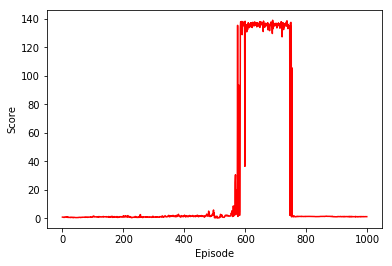

In [2]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(10,5))
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Score")
plt.plot(episode_scores, color='r')

plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The initial task I sought to acheive was to get the drone to fly 200m in the air and then perform a barrel roll (2pi rotation on the euler x angle).  I designed the reward function to give an exponentially increasing reward based on the subgoals met and how close to the next goal the agent is.  (2 ^ (number of subgoals met ^2)) * (percentage of the progress to the next goal).  After running this a few times I noticed that higher episode scores were not always associated with highest hights (meaning spending time in a relatively high spot is rewarded better than touching briefly a much higher one) so I added a discount to the reward if it goes away from the goal (multiply reward by 0.1).  

After spending a lot of time trying to get the algorithm to associate closeness to the goal to get higher rewards, I decided it was best to set the sights a little lower for the goal task.  I now ammended the task to be to just get to 200m in the air and am using a similar sub-goal based reward (with sub-goal thresholds being 50,100,150,200 meters).

I also experimented with a time penalty that punishes more the further from the goal, but that seemed to make the drone want to crash and end the episode sooner in order to minimize the penalty.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
Initially I knew I wanted to use a duelling network because the lessons indicated because I knew the actions would be more important than the states for my task (simply flying to 200m now) so with this I can give a head start to the Q predictions because I can shrink the complexity of state or action network and focus the agent's attention on whichever proved more useful for this task. I ended up choosing to use actor critic model because I noticed that the sample implementation has separate branches for the states and actions in the critic and also intuitively actor critic seems like the best way to learn.

The hyperparameters I used were:
self.tau = 0.001
I fiddled with many other hyperparams but they didn't affect the results as much as reward function and nn architecture did so I kept those the same as the example.

critic:
(states solo) 2 dense layers, 32 units, relu activation
(actions solo) 2 dense layers, 32 units, relu activation
(state action combined) 1 dense layer, 64 units, relu activation, and one output layer of size 1

actor:
2 dense layers, 16 then 8 units, relu activation, and one output layer of size 4 (action size)

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
The task was very easy to understand but the path to finding good results is pretty difficult.  There are a lot of pitfalls in this project where if you don't do one part the right way (good reward function for example), it doesn't matter what the other hyperparameters or configurations are, it just won't work.

The learning curve at first was gradual and made sense (getting to the point of defining the agent and task) but I have still yet to have an aha moment for the hyperparameter settings or even the reward function.

The performance of the agent was pretty terrible the whole time and frequently had episodes where, after getting so close to the goal in the previous episodes, were just having a fraction of the performance, either for a handful of episodes or for the remainder.

The most recent runs have had some success, accomplishing the goal in some episodes and getting very close in others (the shrinking of actor network and time penalty probably did the trick).

edit for resubmission:

Added a penalty for when time runs out or the drone crashes.

Added batch normalization to actor and critic network.  This change seems to have a spike in performance later but still gets in a hole of constant crashing.  Also added dropout layers to both actor and critic networks.

Added reward clipping by giving a positive reward based on which tier of goals were met, how close to the next subgoal, how high the vertical velocity is, and punishing a decrease in height as well as still a large negative reward for timing out/crashing.

This final change to the reward seemed to make it perform a lot better and it's more clear to see why; my reward function before was just asking for the exploding gradients problem to happen.

I also experimented with taking out the tier reward, essentially to reward good behavior rather than good progress.

Additionally multiplied the reward by 0.9 and added 0.1 to the reward function in order to reward staying alive.

After fiddling with these some more to make the results more consistent, I've gotten to a worse point, but now cannot retrace my parameters back to where they were "bad but sort of acceptable"

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest parts were definitely the reward function and the hyperparameters.  Everything else was a very managable level of difficulty.  Additionally, having to log and plot coordinates and values in order to measure learning and progress were difficult and a task like this would be much easier to understand (and more fun) if it could be visualized in 3D.